# 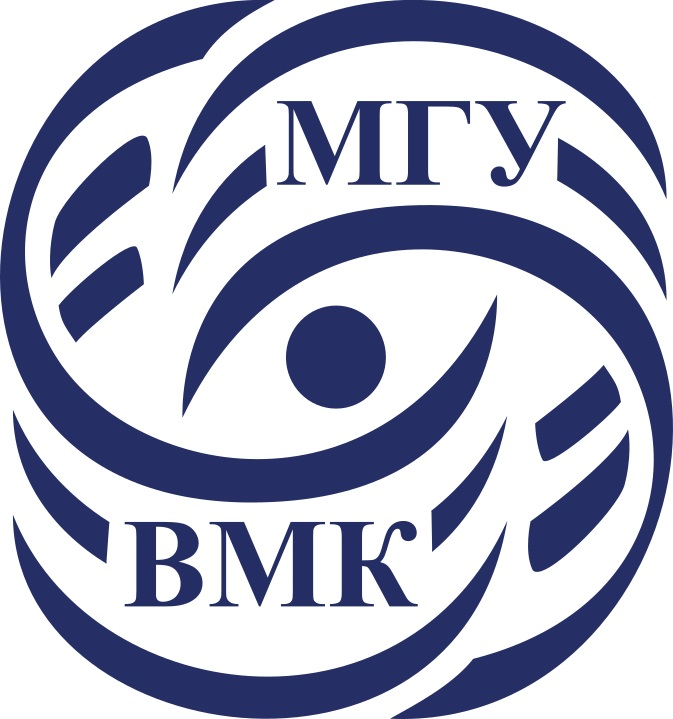

# Машинное обучение. ВМК МГУ

# Практическое задание 4: Анализ данных и обработка категориальных признаков

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Error:

	HTTPSConnectionPool(host='drive.google.com', port=443): Max retries
	exceeded with url: /uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q (Caused by
	NameResolutionError("<urllib3.connection.HTTPSConnection object at
	0x000002859D730280>: Failed to resolve 'drive.google.com' ([Errno
	11001] getaddrinfo failed)"))

To report issues, please visit https://github.com/wkentaro/gdown/issues.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/requirements_2024_25_for_colab_small.txt'


Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# Часть 1. Анализ и обработка данных

В прошлом ноутбуке мы познакомились, как можно вызывать методы машинного обучения с помощью библиотеки `sklearn`. Казалось бы, бери самые передовые методы машинного обучения (да и нейросетей), применяй на данные, и радуйся жизни. Но на самом деле, на качество решения задачи влияет не столько вид модели, а то, какие данные мы подаем этой модели.

В реальном мире данные редко бывают безупречными. Они могут включать ошибки ввода, неточности, пропуски и выбросы, что часто происходит из-за человеческих ошибок или нехватки информации. Если не провести предварительную обработку данных, это может негативно сказаться на качестве модели машинного обучения. Поэтому важно уделять внимание анализу и обработке данных перед их использованием.

 При правильном анализе и обработке датасета есть возможность сильно забустить качество, даже сильнее, чем если бы мы взяли какую-то более "мощную" модель машинного обучения.

В данном секции мы разберем основные приемы, которые могут приняться при анализе и обработке данных - этапе, который производится перед подачей данных в саму модель и ее обучении.

## Работа с данными



Будем работать с датасетом [описания квартир на Airbnb](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data)

Мы уже скачали его за вас:

In [3]:
! gdown 1okkVp_-1V-pfoGGOMwSNf6NzIAz6GqJX

Error:

	HTTPSConnectionPool(host='drive.google.com', port=443): Max retries
	exceeded with url: /uc?id=1okkVp_-1V-pfoGGOMwSNf6NzIAz6GqJX (Caused by
	NameResolutionError("<urllib3.connection.HTTPSConnection object at
	0x0000025E9E2E0400>: Failed to resolve 'drive.google.com' ([Errno
	11001] getaddrinfo failed)"))

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [4]:
! unzip Airbnb_Open_Data.csv.zip

"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Работать с данными будем, как и раньше, через `pandas` + `numpy`

In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # установим настройку, чтобы всегда отображались все столбцы

In [6]:
data = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

Посмотрим на все данные:

In [7]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Только на вещественные признаки:

In [8]:
data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Только на категориальные и текстовые:

In [9]:
data.describe(include="object")

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
count,102349,102310,102193,102570,102583,102067,102468,102494,102523,102599,102352,102326,86706,50468,2
unique,61281,2,13190,7,224,1,1,2,3,4,1151,231,2477,1976,1
top,Home away from home,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,$206,$41,6/23/2019,#NAME?,41662/AL
freq,33,51200,881,43792,7937,102067,102468,51474,34343,53701,137,526,2443,2712,2


<font color='LightSteelBlue'>**Пояснение:**</font> Здесь можно увидеть, что некоторые вещественные данные на самом деле хорошо бы считать категориальными (например `id`), а некоторые категориальные - вещественными (наприер, `price`). Данные наблюдения как раз относятся к анализу данных - если поправить тип данных, то можно потенциально улучшить качество модели

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

1) <font color='DarkOrange'>**[0.5 баллa]:**</font>  Какие еще категориальные и текстовые признаки из датасета на самом деле нужно считать вещественными?

2) <font color='DarkOrange'>**[0.5 баллa]:**</font>  Какие еще вещественные признаки из датасета на самом деле нужно считать категориальными или текстовыми?

В каждом пункте приведите хотя бы по 1 примеру

<font color='MediumOrchid'>**Ваш ответ тут:**</font>


Категориальные и текстовые признаки из датасета нужно считать вещественные: price, service fee


Вещественные признаки из датасета на самом деле нужно считать категориальными или текстовыми: id, host id 

---

### Работа с пропусками в вещественных данных

Но пока не будем это все исправлять: углубимся, как можно работать с пропусками в данных: не все модели хорошо умеют обучаться с пропусками в данных, а также их нивелирование может привести к улучшению качества обучаемых моделей

<font color='MediumTurquoise'>**Tip:**</font> Пропуски в данных для машинного обучения могут возникать из-за ошибок при сборе данных, например, из-за сбоев оборудования или человеческого фактора. Также они могут появляться в результате отсутствия информации, когда респонденты не отвечают на определенные вопросы в опросах или анкетах. Наконец, пропуски могут быть следствием фильтрации данных, когда некоторые записи удаляются из-за несоответствия критериям качества.

В поиске пропущенных значений нам поможет функция info:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [11]:
data.shape

(102599, 26)

#### <font color='DarkOrange'>**Задание 2 [0.5 баллa]**</font>

В скольких столбцах есть хотя бы 1 пропуск?

Можно вывести решение как программно, так и визуально

In [12]:
# your code here
columns_with_nan = data.isna().any()
num_columns_with_nan = columns_with_nan.sum()
print(columns_with_nan)
print(f"Количество столбцов с хотя бы одним пропуском: {num_columns_with_nan}")
for i in data.columns:
    missing_counts = data[i].isna().sum()
    print(missing_counts, i)

id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country code                       True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Количество столбцов с хотя бы одним пропуском: 23

#### <font color='DarkOrange'>**Задание 3 [1 балл]**</font>

На основе пропусков, какой бы вы 1 столбец выкинули из данных как совсем неинформативный?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>


Столбец "license"


(из кода сверху)

----

<font color='plum'>**Подход 1**</font> Удаление объектов с пропусками

Метод немного из "пушки по воробьям", но может быть иногда полезен

Можно удалить все строки, где есть хотя бы 1 пропуск

In [13]:
data_drop_rows = data.dropna(axis="index")

Или все столбцы:

In [14]:
data_drop_columns = data.dropna(axis="columns")

Посмотрим на них:

In [15]:
data_drop_rows.shape

(1, 26)

In [16]:
data_drop_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1 non-null      int64  
 1   NAME                            1 non-null      object 
 2   host id                         1 non-null      int64  
 3   host_identity_verified          1 non-null      object 
 4   host name                       1 non-null      object 
 5   neighbourhood group             1 non-null      object 
 6   neighbourhood                   1 non-null      object 
 7   lat                             1 non-null      float64
 8   long                            1 non-null      float64
 9   country                         1 non-null      object 
 10  country code                    1 non-null      object 
 11  instant_bookable                1 non-null      object 
 12  cancellation_policy             1 non

In [17]:
data_drop_columns.shape

(102599, 3)

In [18]:
data_drop_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         102599 non-null  int64 
 1   host id    102599 non-null  int64 
 2   room type  102599 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


#### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

1) <font color='DarkOrange'>**[1 балл]**</font> Какие проблемы вы видите в подходе удаления строк с пропусками, основываясь на значении data_drop_rows?

2) <font color='DarkOrange'>**[1 балл]**</font> Какие проблемы вы видите в подходе удаления столбцов с пропусками, основываясь на значении data_drop_columns?

<font color='MediumOrchid'>**Ваши выводы тут:**</font>


Удаление строк приводит к уменьшению количества данных, при этом удаляются даже довольно информативные данные

Удаление столбцов сокращает возможное количество признаков по которым мы можем оценить данные

---

<font color='plum'>**Подход 2**</font> Замена на число


Можно заменить на конкретное число/среднее по столбцу/медиану по столбцу итд:

In [19]:
data_number = data.select_dtypes('number') # выберем только вещественные признаки

In [20]:
data_number.head()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,40.64749,-73.97237,2020.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1002102,52335172823,40.75362,-73.98377,2007.0,30.0,45.0,0.38,4.0,2.0,228.0
2,1002403,78829239556,40.80902,-73.94190,2005.0,3.0,0.0,NaN,5.0,1.0,352.0
3,1002755,85098326012,40.68514,-73.95976,2005.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1003689,92037596077,40.79851,-73.94399,2009.0,10.0,9.0,0.10,3.0,1.0,289.0


In [21]:
tmp = data_number.fillna(0) # на 0

In [22]:
tmp.head() # Обратите внимание на изменение 2й строки в столбце reviews per month

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,40.64749,-73.97237,2020.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1002102,52335172823,40.75362,-73.98377,2007.0,30.0,45.0,0.38,4.0,2.0,228.0
2,1002403,78829239556,40.80902,-73.94190,2005.0,3.0,0.0,0.00,5.0,1.0,352.0
3,1002755,85098326012,40.68514,-73.95976,2005.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1003689,92037596077,40.79851,-73.94399,2009.0,10.0,9.0,0.10,3.0,1.0,289.0


In [23]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   host id                         102599 non-null  int64  
 2   lat                             102599 non-null  float64
 3   long                            102599 non-null  float64
 4   Construction year               102599 non-null  float64
 5   minimum nights                  102599 non-null  float64
 6   number of reviews               102599 non-null  float64
 7   reviews per month               102599 non-null  float64
 8   review rate number              102599 non-null  float64
 9   calculated host listings count  102599 non-null  float64
 10  availability 365                102599 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 8.6 MB


In [24]:
tmp = data_number.fillna(data_number.mean()) # Обратите внимание на изменение 2й строки в столбце reviews per month
tmp.head()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,40.64749,-73.97237,2020.0,10.0,9.0,0.210000,4.0,6.0,286.0
1,1002102,52335172823,40.75362,-73.98377,2007.0,30.0,45.0,0.380000,4.0,2.0,228.0
2,1002403,78829239556,40.80902,-73.94190,2005.0,3.0,0.0,1.374022,5.0,1.0,352.0
3,1002755,85098326012,40.68514,-73.95976,2005.0,30.0,270.0,4.640000,4.0,1.0,322.0
4,1003689,92037596077,40.79851,-73.94399,2009.0,10.0,9.0,0.100000,3.0,1.0,289.0


In [25]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   host id                         102599 non-null  int64  
 2   lat                             102599 non-null  float64
 3   long                            102599 non-null  float64
 4   Construction year               102599 non-null  float64
 5   minimum nights                  102599 non-null  float64
 6   number of reviews               102599 non-null  float64
 7   reviews per month               102599 non-null  float64
 8   review rate number              102599 non-null  float64
 9   calculated host listings count  102599 non-null  float64
 10  availability 365                102599 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 8.6 MB


#### <font color='DarkOrange'>**Задание 5 [0.5 баллa]**</font>

По аналогии с предыдущим кодом, замените пропуски на медианы по столбцам

In [26]:
# your code here
col = data.select_dtypes('number').columns
tmp = data[col].fillna(data[col].median())
tmp.head()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,40.64749,-73.97237,2020.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1002102,52335172823,40.75362,-73.98377,2007.0,30.0,45.0,0.38,4.0,2.0,228.0
2,1002403,78829239556,40.80902,-73.94190,2005.0,3.0,0.0,0.74,5.0,1.0,352.0
3,1002755,85098326012,40.68514,-73.95976,2005.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1003689,92037596077,40.79851,-73.94399,2009.0,10.0,9.0,0.10,3.0,1.0,289.0


#### <font color='DarkOrange'>**Задание 6 [1 балл]**</font>

В чем основное преимущество замены на медиану по сравнению со средним с точки зрения анализа выбросов (аномальных значений)?

<font color='MediumOrchid'>**Ваши выводы тут:**</font>


Медиана делит набор данных на две равные части,не зависит от величины крайних значений, значит даже если в данных есть выбросы, медиана останется относительно неизменной.

Среднее это арифметическая сумма всех значений, деленная на их количество. Если в данных присутствуют выбросы, они могут значительно сместить среднее значение, что приведет к неправильному ответу.

Поэтому основное преимущество замены пропусков на медиану по сравнению со средним заключается в устойчивости медианы к выбросам

### Работа с пропусками в категориальных признаках


In [27]:
data_object = data.select_dtypes('object') # выберем невещественные значения

In [28]:
data_object.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,United States,US,False,strict,Private room,$966,$193,10/19/2021,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,United States,US,False,moderate,Entire home/apt,$142,$28,5/21/2022,Pet friendly but please confirm with me if the...,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,United States,US,True,flexible,Private room,$620,$124,NaN,"I encourage you to use my kitchen, cooking and...",NaN
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,United States,US,True,moderate,Entire home/apt,$368,$74,7/5/2019,NaN,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,United States,US,False,moderate,Entire home/apt,$204,$41,11/19/2018,"Please no smoking in the house, porch or on th...",NaN


<font color='plum'>**Подход 1**</font> Замена на определенную новую категорию


In [29]:
tmp = data_object.fillna("other") # обратите внимание на столбец house_rules в 4й строке
tmp.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,United States,US,False,strict,Private room,$966,$193,10/19/2021,Clean up and treat the home the way you'd like...,other
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,United States,US,False,moderate,Entire home/apt,$142,$28,5/21/2022,Pet friendly but please confirm with me if the...,other
2,THE VILLAGE OF HARLEM....NEW YORK !,other,Elise,Manhattan,Harlem,United States,US,True,flexible,Private room,$620,$124,other,"I encourage you to use my kitchen, cooking and...",other
3,other,unconfirmed,Garry,Brooklyn,Clinton Hill,United States,US,True,moderate,Entire home/apt,$368,$74,7/5/2019,other,other
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,United States,US,False,moderate,Entire home/apt,$204,$41,11/19/2018,"Please no smoking in the house, porch or on th...",other


In [30]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   NAME                    102599 non-null  object
 1   host_identity_verified  102599 non-null  object
 2   host name               102599 non-null  object
 3   neighbourhood group     102599 non-null  object
 4   neighbourhood           102599 non-null  object
 5   country                 102599 non-null  object
 6   country code            102599 non-null  object
 7   instant_bookable        102599 non-null  object
 8   cancellation_policy     102599 non-null  object
 9   room type               102599 non-null  object
 10  price                   102599 non-null  object
 11  service fee             102599 non-null  object
 12  last review             102599 non-null  object
 13  house_rules             102599 non-null  object
 14  license                 102599 non-n

<font color='plum'>**Подход 2**</font> Замена на самую частую категорию по столбцам

In [31]:
tmp = data_object.fillna(data_object.mode().iloc[0])
tmp.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,United States,US,False,strict,Private room,$966,$193,10/19/2021,Clean up and treat the home the way you'd like...,41662/AL
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,United States,US,False,moderate,Entire home/apt,$142,$28,5/21/2022,Pet friendly but please confirm with me if the...,41662/AL
2,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,United States,US,True,flexible,Private room,$620,$124,6/23/2019,"I encourage you to use my kitchen, cooking and...",41662/AL
3,Home away from home,unconfirmed,Garry,Brooklyn,Clinton Hill,United States,US,True,moderate,Entire home/apt,$368,$74,7/5/2019,#NAME?,41662/AL
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,United States,US,False,moderate,Entire home/apt,$204,$41,11/19/2018,"Please no smoking in the house, porch or on th...",41662/AL


In [32]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   NAME                    102599 non-null  object
 1   host_identity_verified  102599 non-null  object
 2   host name               102599 non-null  object
 3   neighbourhood group     102599 non-null  object
 4   neighbourhood           102599 non-null  object
 5   country                 102599 non-null  object
 6   country code            102599 non-null  object
 7   instant_bookable        102599 non-null  bool  
 8   cancellation_policy     102599 non-null  object
 9   room type               102599 non-null  object
 10  price                   102599 non-null  object
 11  service fee             102599 non-null  object
 12  last review             102599 non-null  object
 13  house_rules             102599 non-null  object
 14  license                 102599 non-n

-------

### Работа с дублями

Иногда необходимо удалять дубли из данных, так как несколько одинаковых объектов не всегда указывают на их большую значимость для алгоритма. Дубли могут возникать также из-за ошибок ввода.

In [33]:
data_geo = data[["lat", "long"]].copy()
data_geo

,lat,long
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
102594,40.70862,-73.94651
102595,40.80460,-73.96545
102596,40.67505,-73.98045
102597,40.74989,-73.93777


In [34]:
data_geo.drop_duplicates()

,lat,long
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
68289,40.75330,-73.99224
68290,40.84722,-73.93501
68291,40.84753,-73.94073
68292,40.76181,-73.93087


### Работа с вещественными выбросами (аномалиями)

Каждый признак в данных имеет свое распределение, которое описывает, как значения этого признака распределены по всему набору данных. Одним из способов выявления аномалий является использование интерквартильного размаха (IQR), который показывает диапазон значений между первым (Q1) и третьим квартилями (Q3).

$$IQR = Q_3 - Q_1$$

где $Q_1$ — первая квартиль — такое значение признака, меньше которого ровно 25% всех значений признаков. $Q_3$ — третья квартиль — значение, меньше которого ровно 75% всех значений признака.


Аномалии могут быть определены как значения, выходящие за пределы диапазона

$$[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]$$

 Такой подход позволяет эффективно находить выбросы, которые могут искажать анализ данных. Использование IQR помогает улучшить качество модели и повысить ее точность, исключая ненадежные данные.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

В отображение графика box_plot (коробка с усами) уже входит отображение точек, выходящие за интерквартильный размах - в данном случает они выглядят как крулгые точки

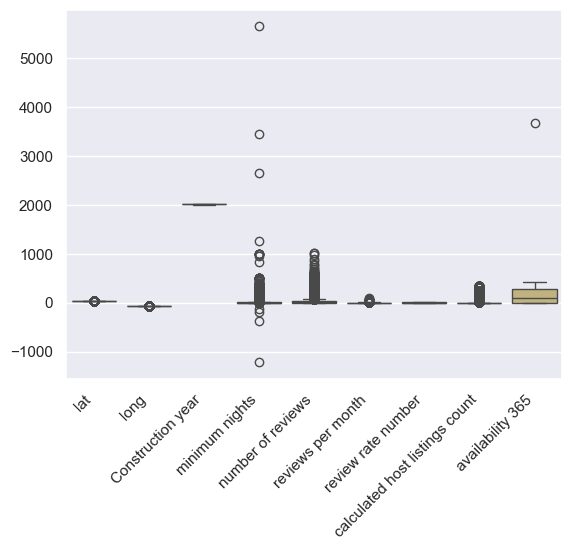

In [36]:
data_new = data.select_dtypes('number').drop(["id", "host id"], axis=1)
sns.boxplot(data_new)
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
quantiles = data_new.quantile([0.25, 0.75])
quantiles

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0.25,40.68874,-73.98258,2007.0,2.0,1.0,0.22,2.0,1.0,3.0
0.75,40.76276,-73.93235,2017.0,5.0,30.0,2.00,4.0,2.0,269.0


#### <font color='DarkOrange'>**Задание 7 [1 балл]**</font>

Посчитайте интерквартильный размах для всех признаков из `data_new`, удалите выбросы из `data_new` по предложенному правилу и отобразите новый очищенный датафрейм на аналогичном box_plot графике

In [38]:
# your code here
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_without_anomalies = data_new[(data_new >= lower_bound) & (data_new <= upper_bound)]

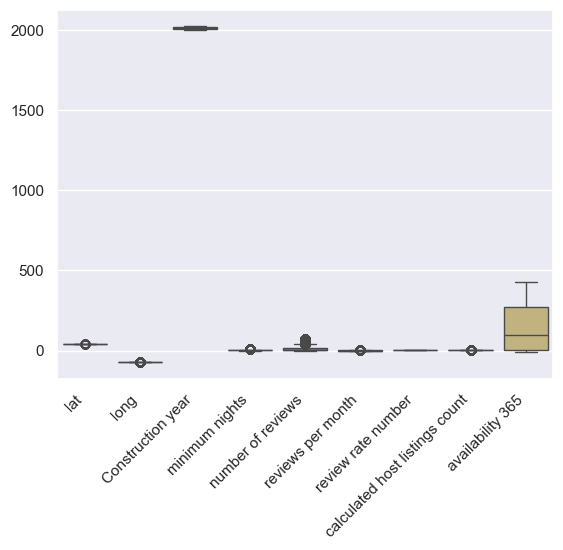

In [39]:
sns.boxplot(data_without_anomalies)
plt.xticks(rotation=45, ha='right')
plt.show()

#### <font color='DarkOrange'>**Задание 8 [1 балл]**</font>

Почему на получившемся графике все еще отображаются точки (аномалии)?

<font color='MediumOrchid'>**Ваши выводы тут:**</font>


Аномалии остаются так как при удалении данных не входящих в интерквантильный размах, у данных уже новые квантили, которые считает seaborn для отметки выбросов, однако эти выбросы становятся уже не такими большими

### Работа с категориальными выбросами (аномалиями)

Анализ встречаемости категориальных признаков позволяет выявить категории с низкой частотой. Их можно объединить, что ускорит обучение алгоритмов и может улучшить качество модели. Этот подход также помогает обнаружить битые данные, о чем мы поговорим далее.

In [40]:
data_new = data.select_dtypes('object')
value_counts = data_new["neighbourhood group"].value_counts(ascending=False)
value_counts

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

Например, в признаке `neighbourhood group` всего 2 выделяющихся значений: их можно как и записать в категорию `other`, так и в целом удалить из данных

In [41]:
column_name = "neighbourhood group"
data_new[data_new[column_name].isin(value_counts[value_counts <= 100].index)] = "other"
data_new["neighbourhood group"].value_counts(ascending=False)

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
other                2
Name: count, dtype: int64

---

# Часть 2. Обработка категориальных признаков

Перед работой с данными сделаем небольшую работу над ними:

In [42]:
def parse_price(x):
    try:
        return float(x[1:])
    except:
        return None

In [43]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [44]:
data['price_value'] = data['price'].apply(lambda x: parse_price(x))
data['service_fee_value'] = data['service fee'].apply(lambda x: parse_price(x))
data_cleared = data.dropna(subset=['price_value', 'service_fee_value'], axis=0)
data_cleared = data_cleared.drop(['price', 'id', 'host id', 'service fee'], axis=1)
data_cleared

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_value,service_fee_value
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,966.0,193.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,142.0,28.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,620.0,124.0
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN,368.0,74.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,204.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102592,3BR/1 Ba in TriBeCa w/ outdoor deck,unconfirmed,Nick,Manhattan,Tribeca,40.71845,-74.01183,United States,US,False,moderate,Entire home/apt,2016.0,1.0,0.0,NaN,NaN,2.0,1.0,177.0,Guests should treat my home as if it were thei...,NaN,787.0,157.0
102594,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN,844.0,169.0
102595,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN,837.0,167.0
102596,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN,988.0,198.0


Заменим все пропуски в вещественных признаках на среднее:

In [45]:
number_columns = data_cleared.select_dtypes(include=['number']).columns

data_cleared[number_columns] = data_cleared[number_columns].fillna(data_cleared[number_columns].mean())

Пусть целевое значение, которое мы хотим предсказать - это `price`. Все остальное - признаки.

Выделим обучающую и тестовую выборки:

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data_cleared.drop('price_value', axis=1), data_cleared[['price_value']], test_size=0.2)

In [48]:
X_train

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,service_fee_value
70394,2 floor Luxury Loft in the best location!,verified,S,Manhattan,Chelsea,40.74398,-73.99624,United States,US,False,flexible,Entire home/apt,2017.0,6.0,127.0,6/14/2019,1.680000,2.00000,2.0,303.0,NaN,NaN,114.0
5417,Central Park Life! Beautiful 1 Bed.,verified,Mike,Manhattan,Upper West Side,40.76904,-73.98494,United States,US,False,moderate,Entire home/apt,2012.0,30.0,8.0,7/1/2018,0.130000,4.00000,52.0,184.0,NaN,NaN,33.0
38548,"SPACIOUS, PRIVATE ROOM IN MIDTOWN, PARK AVENUE",verified,Isabel,Manhattan,Midtown,40.74475,-73.98337,United States,US,True,flexible,Private room,2007.0,1.0,51.0,6/23/2019,7.390000,3.00000,2.0,29.0,"Smoking allowed outside, on grounds, pets unde...",NaN,136.0
68499,Spacious Room in Sunny Brownstone (Ft. Greene),unconfirmed,Chandra,Brooklyn,Clinton Hill,40.68660,-73.96761,United States,US,True,strict,Private room,2018.0,2.0,0.0,NaN,1.369945,5.00000,1.0,0.0,NaN,NaN,10.0
89686,"Comfortable, cozy apartment in Bed Stuy",unconfirmed,Aryanna,Brooklyn,Bedford-Stuyvesant,40.68084,-73.92038,United States,US,False,moderate,Entire home/apt,2009.0,2.0,107.0,6/23/2019,3.470000,5.00000,1.0,81.0,NaN,NaN,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,West Village - Celebrities + LIGHT,unconfirmed,Lee,Manhattan,West Village,40.73191,-74.00679,United States,US,True,moderate,Entire home/apt,2017.0,3.0,0.0,NaN,1.369945,5.00000,1.0,224.0,"No smoking, no pets. No jumping on bed or couc...",NaN,62.0
78897,Large Room in Garden Apartment,verified,Mauro,Brooklyn,Bedford-Stuyvesant,40.68348,-73.95123,United States,US,False,moderate,Private room,2022.0,3.0,3.0,3/27/2017,0.110000,2.00000,1.0,0.0,I'm a semi kosher vegetarian which means that ...,NaN,191.0
1000,ARTIST LOFT+OFFICE in PRIME WILLIAMSBURG!,verified,Reed,Brooklyn,Williamsburg,40.70930,-73.96484,United States,US,True,strict,Private room,2013.0,3.0,269.0,6/5/2019,3.090000,3.28592,3.0,394.0,No Pets. No Smoking.,NaN,57.0
19396,Guest suite in owner-occupied private residence,unconfirmed,Martin,Brooklyn,Bushwick,40.69980,-73.92167,United States,US,False,strict,Entire home/apt,2006.0,2.0,72.0,6/20/2019,2.200000,3.00000,1.0,146.0,NaN,NaN,176.0


Чуть позже будем пытаться обучить knn-регрессор.

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# не забываем сделать нормировку, так как метод метрический

X_train_number = np.array(X_train.select_dtypes('number'))
X_test_number = np.array(X_test.select_dtypes('number'))

scaler = MinMaxScaler()
scaler.fit(X_train_number)

X_train_number_scaled = scaler.transform(X_train_number)
X_test_number_scaled = scaler.transform(X_test_number)

Одним из способов переводить категориальные признаки в численное представления является <font color='CornflowerBlue'>**One-Hot Encoding (OHE).**</font>

Это метод кодирования категориальных признаков, который преобразует каждую категорию в отдельный бинарный вектор. Для каждой уникальной категории создается новая колонка, где значение 1 указывает на присутствие данной категории, а 0 — на ее отсутствие. Например, если у нас есть признак "Цвет" с категориями "Красный", "Зеленый" и "Синий", OHE создаст три новых колонки: "ЦветКрасный", "ЦветЗеленый" и "ЦветСиний". Это позволяет алгоритмам машинного обучения лучше воспринимать категориальные данные, так как они не могут обрабатывать текстовые значения напрямую.

<font color='OrangeRed'>**Примечание**</font> Однако стоит помнить, что OHE может привести к увеличению размерности данных, особенно при наличии большого количества категорий.

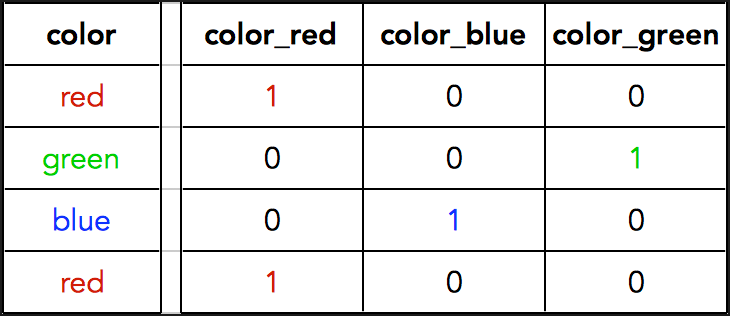

Существует два наиболее используемых способа применения данного алгоритма:

1) Через метод `pandas.get_dummies`

2) Через трансформер в `sklearn` `OneHotEncoder`

Давайте закодируем несколько признаков с помощью OHE и посмотрим, как обучать модель:

In [50]:
from sklearn.preprocessing import OneHotEncoder

columns = ["host_identity_verified", "neighbourhood group", "room type", "cancellation_policy"]

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# sparse_output - ставим такой параметр, чтобы вернулась обычная матрица
# handle_unknown - не будет падать из-за ошибок
enc.fit(X_train[columns])

train_neighbourhood_group_ohe = enc.transform(X_train[columns])
test_neighbourhood_group_ohe = enc.transform(X_test[columns])

Посмотрим, на сколько увеличилось число признаков:

In [51]:
train_neighbourhood_group_ohe.shape

(67410, 18)

Составим новый датасет:

In [52]:
X_train_new = np.hstack((X_train_number_scaled, train_neighbourhood_group_ohe))
X_test_new = np.hstack((X_test_number_scaled, test_neighbourhood_group_ohe))

In [53]:
regr = KNeighborsRegressor(n_neighbors=5)

regr.fit(X_train_new, np.array(y_train))

KNeighborsRegressor()

In [54]:
mean_squared_error(regr.predict(X_test_new), np.array(y_test)) # может работать несколько секунд

2575.872910461045

### <font color='DarkOrange'>**Задание 9 [2 баллa]**</font>

Изучите, как работает метод [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) и проделайте аналогичную операцию кодирования, используя только его

Покажите, что модель с такими же признаки тоже обучается и выдает примерно такое же качество

In [55]:
#  your code here

train_dummies_product = pd.get_dummies(X_train[columns])
X_train_dummies = train_dummies_product.to_numpy()
test_dummies_product = pd.get_dummies(X_test[columns])
X_test_dummies = test_dummies_product.reindex(columns=train_dummies_product.columns, fill_value=0).to_numpy()

X_train_new = np.hstack((X_train_number_scaled, X_train_dummies))
X_test_new = np.hstack((X_test_number_scaled, X_test_dummies))

regr = KNeighborsRegressor(n_neighbors=5)
regr.fit(X_train_new, np.array(y_train))

mean_squared_error(regr.predict(X_test_new), np.array(y_test))


2519.0985984691147

Модель с такими же признаки тоже обучается и выдает примерно такое же 
(при запуске несколько раз весь код, качество улучшается)